**Simple Linier Regression** Data Set

In [35]:
import pandas as pd

bola = {'diameter' : [6,8,10,14,18],
        'harga' : [7,9,13,17.5,20]}

bola_df = pd.DataFrame(bola)
bola_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,20.0


<function matplotlib.pyplot.show>

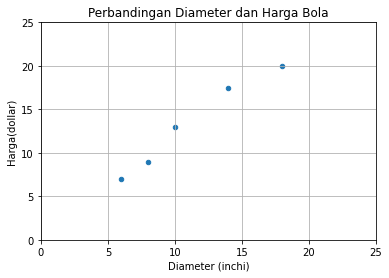

In [36]:
import matplotlib.pyplot as plt

bola_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Bola')
plt.xlabel('Diameter (inchi)')
plt.ylabel('Harga(dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show

**Model Simple Linier Regression**

1. Penyesuaian Dataset

In [37]:
import numpy as np

x = np.array(bola_df['diameter'])
y = np.array(bola_df['harga'])

print(f'x : {x}')
print(f'y : {y}')

x : [ 6  8 10 14 18]
y : [ 7.   9.  13.  17.5 20. ]


In [38]:
X = x.reshape(-1,1)
X.shape

(5, 1)

In [39]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

**Training Simple Linier Regression Model**

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Visualisasi Simple Linier Regression Model**

In [41]:
X_vis = np.array([0, 25]).reshape(-1,1)
y_vis = model.predict(X_vis)

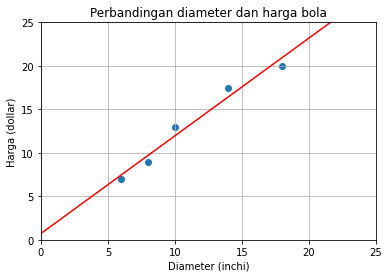

In [42]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan diameter dan harga bola')
plt.xlabel('Diameter (inchi)')
plt.ylabel('Harga (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid()
plt.show()

In [43]:
print(f'intercept: {model.intercept_}')
print(f'slope. {model.coef_}')

intercept: 0.7241379310344875
slope. [1.12284483]


**Mencari Nilai Slope**

In [44]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 20. ]


**Variance**

In [45]:
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 23.2


**Covariance**

In [46]:
np.cov(X.flatten(), y)

array([[23.2 , 26.05],
       [26.05, 30.2 ]])

In [47]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covarience: {covariance_xy}')

covarience: 26.049999999999997


**Nilai Slope**

In [48]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 1.1228448275862069


**Mencari nilai Intercept**

In [49]:
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept:{intercept}')

intercept:0.724137931034484


**Prediksi harga bola berdasarkan ukuran diameter**

In [50]:
diameter_bola = np.array([7, 13, 15]). reshape(-1, 1)
diameter_bola

array([[ 7],
       [13],
       [15]])

In [51]:
prediksi_harga = model.predict(diameter_bola)
prediksi_harga

array([ 8.58405172, 15.32112069, 17.56681034])

In [52]:
for dmtr, hrg in zip(diameter_bola, prediksi_harga):
  print(f'Diameter : {dmtr} prediksi harga : {hrg}')

Diameter : [7] prediksi harga : 8.584051724137934
Diameter : [13] prediksi harga : 15.321120689655174
Diameter : [15] prediksi harga : 17.566810344827587


**Evaluasi simple linier regression model training & testing dataset**

In [53]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 20])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1,1)
y_test = np.array([11, 8.5, 15, 18, 11])

**Training simple linear regression model**

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Evaluasi linear regression model dengan coefficiten of determination atau R-squared**

In [55]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6213315163349296
